<a href="https://colab.research.google.com/github/Tamerly/Data_analisys_learning/blob/main/Taxi_Peru_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!gdown --id 1VOU1mS6UUFI80GBiTU_uUIW7FN7qIuon

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VOU1mS6UUFI80GBiTU_uUIW7FN7qIuon
To: /content/taxi_peru.csv
100% 6.61M/6.61M [00:00<00:00, 114MB/s]


In [5]:
import pandas as pd

In [6]:
taxi = pd.read_csv('/content/taxi_peru.csv',
                   sep=';',
                   parse_dates=['start_at', 'end_at', 'arrived_at'])

In [7]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0




*   journey_id – уникальный id поездки
*   user_id – id пользователя
* driver_id – id водителя
* taxi_id – id машины
* icon – тип поездки
* start_type – тип заказа (asap, reserved, delayed)
* start_at – время начала поездки
* start_lat – исходное местоположение пользователя, широта
* start_lon – исходное местоположение пользователя, долгота
* end_at – время окончания поездки
* end_lat – итоговое местоположение, широта
* end_lon – итоговое местоположение, долгота
* end_state – состояние заказа
* driver_start_lat – исходное местоположение водителя, широта
* driver_start_lon – исходное местоположение водителя, долгота
* arrived_at – время прибытия водителя
* source – платформа, с которой сделан заказ
* driver_score – оценка водителя клиентом
* rider_score – оценка клиента водителем




In [21]:
# c какой платформы было сделано больше всего заказов
total_journeys = taxi.groupby('source', as_index=False) \
    .agg({'journey_id': 'count'}) \
    .sort_values('journey_id', ascending=False)
total_journeys

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [22]:
total_journeys['part'] = total_journeys.journey_id.apply(lambda x: (x * 100 / 22988))
total_journeys

,source,journey_id,part
3,iPhone,9741,42.374282
4,web,7631,33.195580
0,Android,4909,21.354620
2,iPad,571,2.483905
1,Wap,136,0.591613


In [24]:
# визуализация total_journeys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

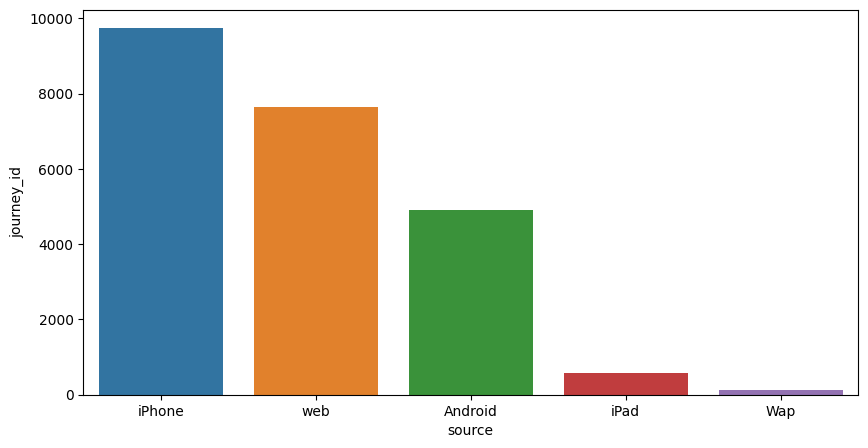

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='source', y='journey_id', data=total_journeys)
